In [1]:
#Importando las librerias necesariaas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Cargando los datos
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
datos_covid=pd.read_csv(url)
# Se muestran las primeras filas del DataFrame para asegurar que los datos se cargaron correctamente
datos_covid.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Se puede observar que el dataset está en formato ancho, lo que significa que los datos están estructurados de manera que cada variable de medida tiene su propia columna y cada fila corresponde a una única observación o registro. En este caso, hay una columna para cada fecha y en las filas podemos ver los países. Convertiremos el dataset a formato largo, ya que es más útil trabajar con los datos en este formato.
Pero antes, eliminaremos algunas columnas que no utilizaremos en este proyecto y renombraremos otras para mayor claridad.

In [3]:
#Creamos un dataset auxiliar para mantener el original intacto
covid_aux=datos_covid
#Eliminamos las columnas que no vamos a usar
covid_aux = covid_aux.drop(['Province/State','Lat','Long'],axis=1)
#Cambiamos el nombre de la columna 'Country/Region'
covid_aux = covid_aux.rename(columns={'Country/Region':'Pais'})

In [4]:
#Cambio a formato largo y se cambio el formato de la columna 'Fecha'
id_vars=["Pais"]
covid_largo = pd.melt(covid_aux, id_vars=id_vars, var_name='Fecha', value_name ='Casos')
covid_largo['Fecha'] = pd.to_datetime(covid_largo['Fecha'], format='%m/%d/%y')
covid_largo

,Pais,Fecha,Casos
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
330322,West Bank and Gaza,2023-03-09,703228
330323,Winter Olympics 2022,2023-03-09,535
330324,Yemen,2023-03-09,11945
330325,Zambia,2023-03-09,343135


Se puede observar que en el formato largo los datos están más organizados y la fecha está en el formato correcto. Ahora, vamos a realizar una exploración del dataset resultante para verificar si hay datos nulos.

In [5]:
covid_largo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Pais    330327 non-null  object        
 1   Fecha   330327 non-null  datetime64[ns]
 2   Casos   330327 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 7.6+ MB


Se aprecia que en las tres columnas no hay ningun dato nulo. Ahora se procede a responder las siguientes preguntas 

1.Top 10 de paises con mas contagios?

2.En cual mes se presentaron mas casos?

3.En el mes con mas casos, cual fue el pais con mas casos?

TOP 10 PAISES CON MAS CONTAGIOS

Para responder esta pregunta, debemos tener en cuenta que los datos de los casos en cada país son acumulativos, es decir, se van sumando día tras día hasta la fecha final registrada, que contiene el total de casos para cada país. Para observar esto de manera más clara, a manera de ejemplo,vamos a visualizar gráficamente los casos de Colombia.

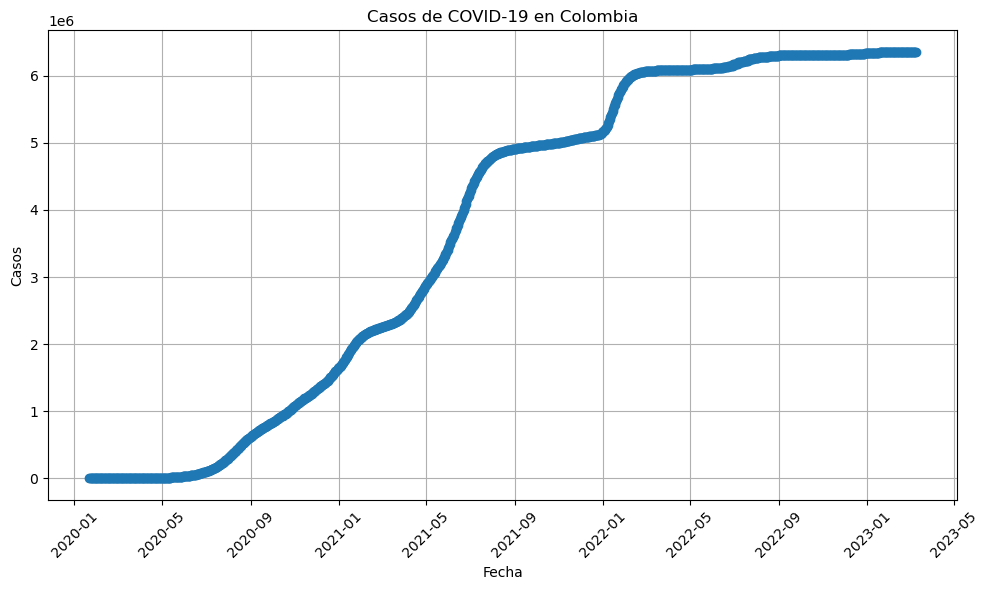

In [6]:
covid_final = covid_largo.groupby(['Pais','Fecha'])['Casos'].sum().reset_index()
colombia_data=covid_final.loc[covid_final['Pais'] == "Colombia"]
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(colombia_data['Fecha'], colombia_data['Casos'], marker='o', linestyle='-')
plt.title('Casos de COVID-19 en Colombia')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


El gráfico muestra la evolución de los casos de COVID-19 en Colombia a lo largo del tiempo. Se observa un aumento constante en el número de casos confirmados, lo que confirma que los casos son acumulativos. Esta tendencia refleja la propagación continua del virus en el país.
Teniendo en cuenta lo anterior para obtener el top 10 de paises con mas casos, debemos agrupar estos por la ultima fecha de la cual se tenga registro.

In [7]:
max_dates = covid_final.groupby('Pais')['Fecha'].max().reset_index()
# Fusionar los resultados con el DataFrame original para obtener los casos correspondientes a la fecha máxima
max_cases = pd.merge(max_dates, covid_final, on=['Pais', 'Fecha'], how='left')
# Ordenar por el número de casos en orden descendente
max_cases_sorted = max_cases.sort_values(by='Casos', ascending=False)

# Seleccionar los 10 países con más casos
top_10_countries = max_cases_sorted.head(10)

top_10_countries

,Pais,Fecha,Casos
186,US,2023-03-09,103802702
80,India,2023-03-09,44690738
63,France,2023-03-09,39866718
67,Germany,2023-03-09,38249060
24,Brazil,2023-03-09,37076053
88,Japan,2023-03-09,33320438
94,"Korea, South",2023-03-09,30615522
86,Italy,2023-03-09,25603510
190,United Kingdom,2023-03-09,24658705
147,Russia,2023-03-09,22075858


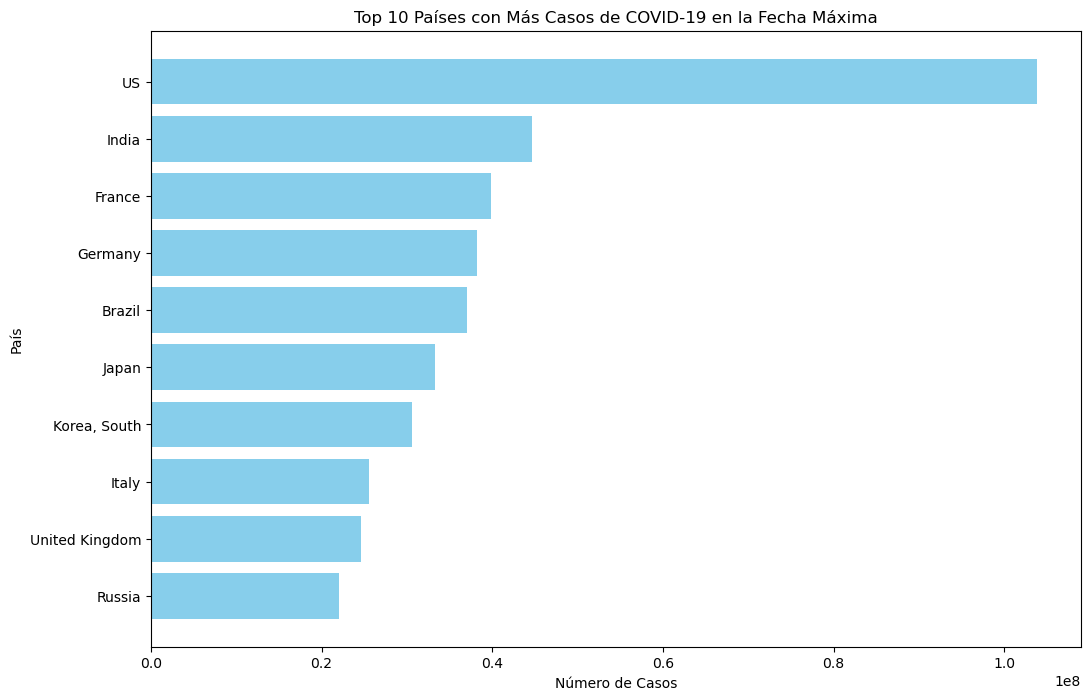

In [8]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(top_10_countries['Pais'], top_10_countries['Casos'], color='skyblue')
plt.xlabel('Número de Casos')
plt.ylabel('País')
plt.title('Top 10 Países con Más Casos de COVID-19 en la Fecha Máxima')
plt.gca().invert_yaxis()  # Invertir el eje y para que el país con más casos esté arriba
plt.show()

El análisis muestra que los Estados Unidos tienen el mayor número de casos acumulativos de COVID-19, con más de 103 millones de casos registrados hasta el 9 de marzo de 2023. Le siguen India y Francia, con aproximadamente 44.7 millones y 39.8 millones de casos, respectivamente. Los datos indican una distribución significativa de casos en varios países, destacando la extensión global de la pandemia. Los países en el top 10 incluyen tanto naciones con grandes poblaciones como economías desarrolladas, lo que subraya la gravedad y el alcance del impacto del COVID-19.

MES CON MAS CASOS

Para responder a este punto, es importante considerar algunos aspectos. Como se mencionó anteriormente, los casos son acumulativos, por lo que es necesario contabilizar los casos diarios para luego obtener los casos mensuales.


In [9]:
#creamos una nueva columna para contabilizar los datos por dia
covid_final['casos_dia']=covid_final.groupby(['Pais'])['Casos'].diff().fillna(covid_final['Casos'])
#creamos dos columnas para sacar el año y mes de cada fecha
covid_final['Anio']=covid_final['Fecha'].dt.year
covid_final['Mes']=covid_final['Fecha'].dt.month
covid_final

,Pais,Fecha,Casos,casos_dia,Anio,Mes
0,Afghanistan,2020-01-22,0,0.0,2020,1
1,Afghanistan,2020-01-23,0,0.0,2020,1
2,Afghanistan,2020-01-24,0,0.0,2020,1
3,Afghanistan,2020-01-25,0,0.0,2020,1
4,Afghanistan,2020-01-26,0,0.0,2020,1
...,...,...,...,...,...,...
229738,Zimbabwe,2023-03-05,264127,0.0,2023,3
229739,Zimbabwe,2023-03-06,264127,0.0,2023,3
229740,Zimbabwe,2023-03-07,264127,0.0,2023,3
229741,Zimbabwe,2023-03-08,264276,149.0,2023,3


Ahora que ya tenemos los casos por día, se procede a agrupar por año y por mes, sumando los casos diarios para obtener los casos mensuales. Esto nos permitirá identificar el mes con más contagios.

In [10]:
casos_mes = covid_final.groupby(['Anio','Mes'])['casos_dia'].sum().reset_index()
casos_mes.rename(columns={'casos_dia':'casos_mes'}, inplace=True)
# Encontrar el mes con el mayor número de casos
mes_mayor_casos = casos_mes[casos_mes['casos_mes'] == casos_mes['casos_mes'].max()]
# Extraer la información del DataFrame
anio = int(mes_mayor_casos.iloc[0]['Anio'])
mes = mes_mayor_casos.iloc[0]['Mes']
numero_casos = mes_mayor_casos.iloc[0]['casos_mes']

# Crear una representación legible del mes
meses = {1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio', 7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'}
mes_nombre = meses[mes]

# Print ordenado
print(f"El mes con mayor número de casos fue {mes_nombre} del año {anio}, con un total de {numero_casos:,} casos.")

El mes con mayor número de casos fue enero del año 2022, con un total de 90,483,564.0 casos.


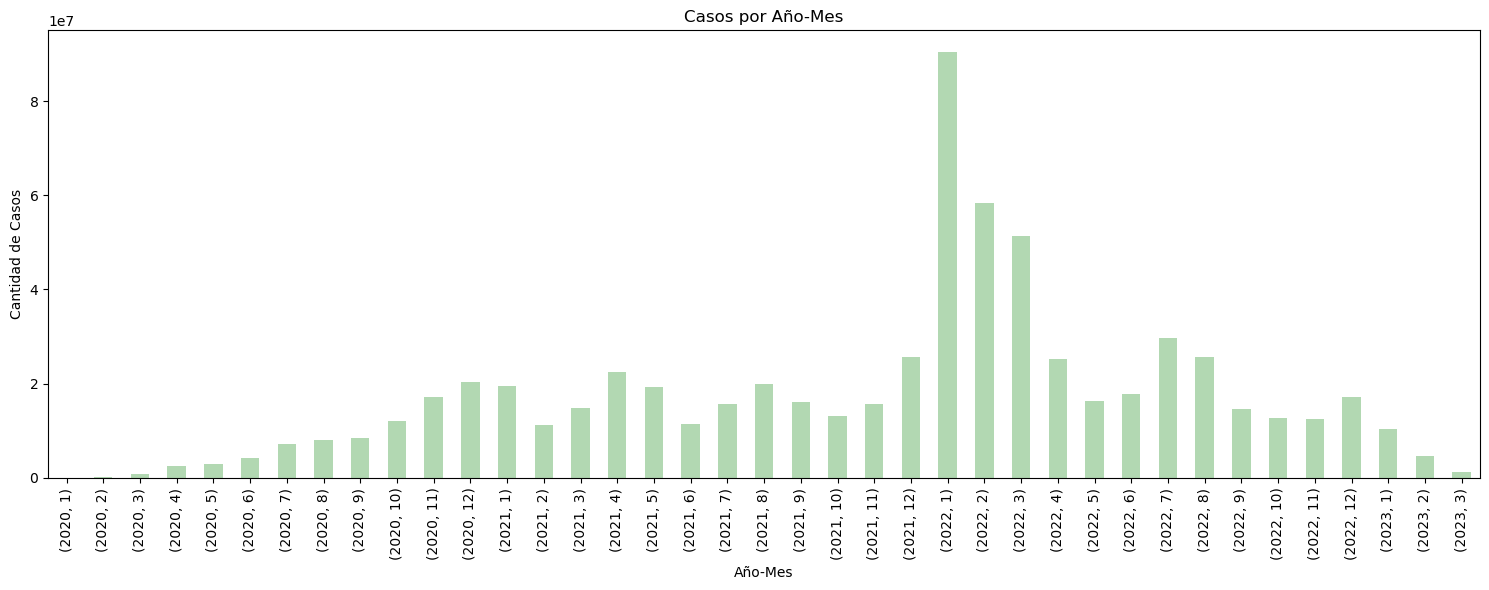

In [11]:
casos_mes.groupby(['Anio', 'Mes'])['casos_mes'].sum().plot(kind='bar', figsize=(15, 6), color ='green', alpha = 0.3)

plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Casos')
plt.title('Casos por Año-Mes')
plt.xticks(rotation = 90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Como se puede observar en el dataset resultante y en el gráfico, el mes con más casos fue enero del año 2022, con 90,483,564 casos. Ahora vamos a identificar el país con más contagios en ese mes.

PAIS CON MAS CASOS EN EL MES CON MAS CASOS

Para identificar el país con más casos en el mes con más contagios, que fue enero de 2022, se agrupan todos los registros de ese mes y se suman los casos diarios para obtener los casos mensuales. Finalmente, se filtra el país con más casos en dicho mes.

In [12]:
pais_mas_casos = covid_final[(covid_final['Anio']==2022)&(covid_final['Mes']==1)]
total_casos_pais_mes = pais_mas_casos.groupby('Pais')['casos_dia'].sum().reset_index()
total_casos_pais_mes.rename(columns={'casos_dia':'casos_mes'}, inplace=True)
pais_final=total_casos_pais_mes.loc[total_casos_pais_mes['casos_mes'].idxmax()]
pais = pais_final['Pais']
numero_casos = pais_final['casos_mes']
print(f"El país con más casos en el mes con más casos fue {pais}, con un total de {numero_casos:,} casos.")

El país con más casos en el mes con más casos fue US, con un total de 20,336,435.0 casos.
